In [1]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# New imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


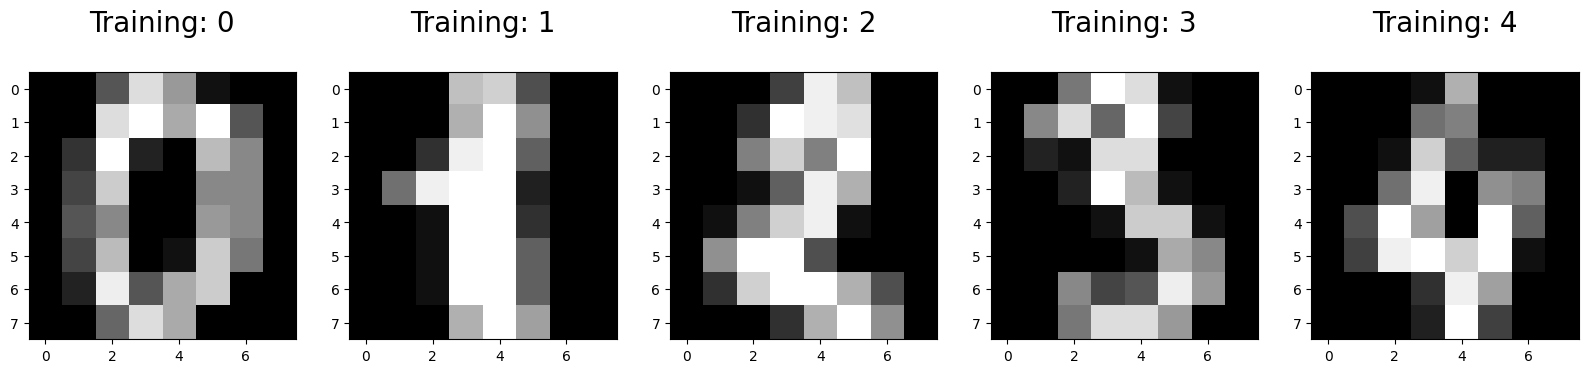

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

load_digits is already imported.

Split the data into train and test sets

In [4]:
# Payback for my disdain for sklearn.datasets class. I know what data and target are
X = digits.data
Y = digits.target
# I still need to double check X and Y dependent variable and independent variable
# I never could remember which was the x axis
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

The purpose of the train set is to train the machine learning model. The model learns patterns and relationships in the data based on this set of labeled examples. The train set is used to adjust the parameters of the model during training.

The purpose of the test set is to evaluate the performance of the trained model. It contains examples that the model has not seen during training. By evaluating the model's performance on the test set, we can assess its ability to generalize to new, unseen data and estimate its real-world performance.

Use the RandomForestClassifier built into scikit-learn to create a classification model.

In [5]:
classification_model = RandomForestClassifier(n_estimators=100, random_state=42)
classification_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [6]:
Y_pred = classification_model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.975925925925926

In [7]:
classification_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Pick one parameter to tune, and explain why you chose this parameter.

In [8]:
best_accuracy = 0
best_max_depth = 0

for max_depth in range(2, 13):
    model = RandomForestClassifier(n_estimators = 100, max_depth = max_depth, random_state = 42)
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = max_depth

print("Best accuracy:", best_accuracy)
print("Best max_depth:", best_max_depth)

Best accuracy: 0.9777777777777777
Best max_depth: 10


In [9]:
best_accuracy = 0
best_n_estimators = 0

for n_estimators in range(10, 201, 10):
    model = RandomForestClassifier(n_estimators = n_estimators, max_depth = 14, random_state = 42)
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print("Best accuracy:", best_accuracy)
print("Best n_estimators:", best_n_estimators)

Best accuracy: 0.975925925925926
Best n_estimators: 70


First I chose max_depth as I kept being surprised with the best max_depth being 4 in past tasks. In this task it came out as 10.

Then I decided to try out n_estimators at a max_depth at 14.(When it was 10 is came out as 100) to see how the max_depth effects the n_estimators.

Select a value the parameter to use during testing on the test data, and provide a rationale for choice.

In [10]:
# n_estimators = 100, max_depth = 10 as that give the accuracy of 0.97778
# random_state = 42 The Hitchhiker's Guide to the Galaxy - by Douglas Adams
# Gargle blaster is not a parameter
sexy_model = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 42)
sexy_model.fit(X_train, Y_train)
sexy_pred = sexy_model.predict(X_test)

Print the confusion matrix for your Random Forest model on the test set

In [11]:
conf_matrix = confusion_matrix(Y_test, sexy_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
conf_matrix

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 63,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 42,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  1, 56]], dtype=int64)

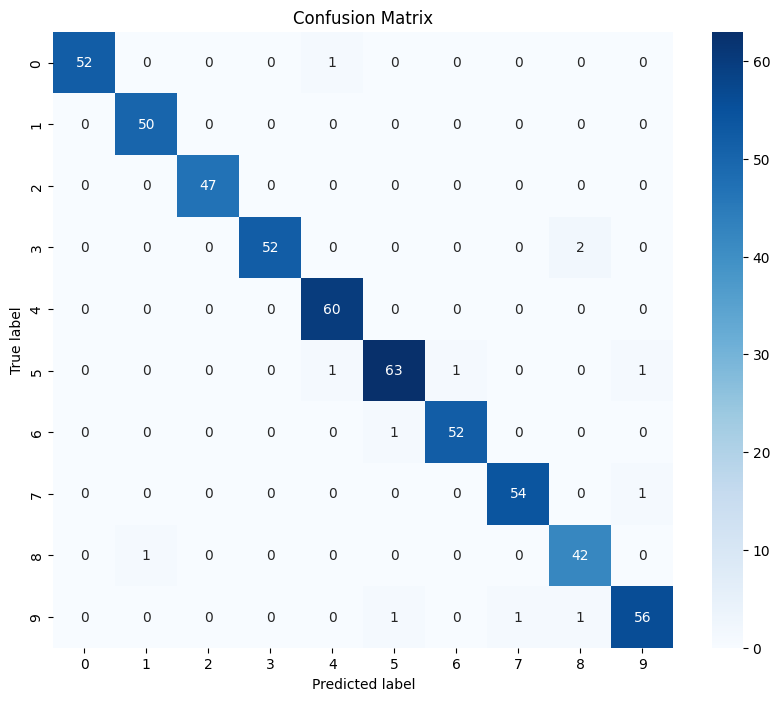

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], yticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Report which classes the model struggles with the most.

There is a count of 2, for 3 being read as 8. However 9 has been read as 5, 7, and 8. The model struggle with 9

Report the accuracy, precision, recall, and f1-score. Hint: use average=”macro” in precision_score, recall_score and f1_score from scikit-learn.

In [13]:
print("Accuracy:", accuracy_score(Y_test, sexy_pred))
print("Precision:",  precision_score(Y_test, sexy_pred, average='macro'))
print("Recall:", recall_score(Y_test, sexy_pred, average='macro'))
print("F1-score:", f1_score(Y_test, sexy_pred, average='macro'))

Accuracy: 0.9777777777777777
Precision: 0.9779165693579909
Recall: 0.9787487478689387
F1-score: 0.9781906563394921
